# Exploratory Data Anaysis

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, sympy
from fractions import Fraction
import cv2
import os, subprocess
from IPython.display import Video, display


## Loading Metadata

In [2]:
mdf = pd.read_csv('../datasrc/compositeOCT_metadata.csv')
mdf.head()

,dx_class,patient_id,laterality,image_type,set,filepath
0,glaucoma,001978,OS,volume,1,../datasrc/volumesOCT/POAG-001978-2012-02-08-O...
1,normal,002743,OS,volume,1,../datasrc/volumesOCT/Normal-002743-2009-03-26...
2,glaucoma,001086,OS,volume,1,../datasrc/volumesOCT/POAG-001086-2008-08-04-O...
3,glaucoma,000092,OS,volume,1,../datasrc/volumesOCT/POAG-000092-2010-12-14-O...
4,glaucoma,003223,OD,volume,1,../datasrc/volumesOCT/POAG-003223-2014-01-10-O...


## Visualizing Metadata

In [6]:
# Custom function for displaying percentages in bar charts / counts plots
def displayPercentages(ax, total, yadjust=.45):
    '''
    Display the percentage of each bar in a bar chart or count plot
    '''

    nzpatches = [ p for p in ax.patches if p.get_height() > 0 ]

    total = sum(p.get_height() for p in nzpatches)

    for p in nzpatches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() * yadjust
        ax.annotate(f'{percent:.2f}%', (x, y), ha='center', va='bottom', fontsize=10)


### Diagnostic Class Distributions 

/tmp/ipykernel_879914/851443298.py:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax = sns.countplot(data=mdf, x='dx_class', hue='set', palette=palette[1:])


Text(0, 0.5, 'Count')

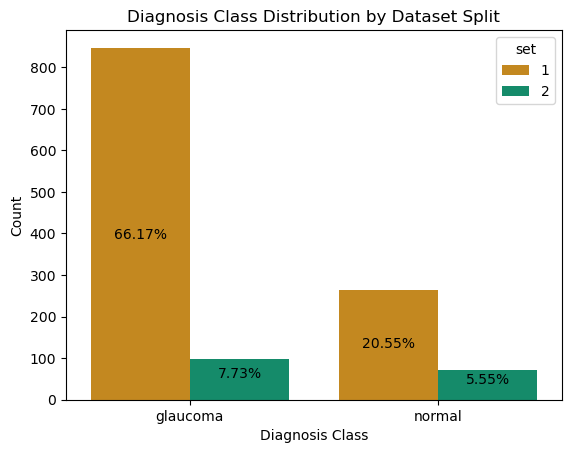

In [9]:
palette = sns.color_palette("colorblind")


# Class Distrubutions
ax = sns.countplot(data=mdf, x='dx_class', hue='set', palette=palette[1:])
total = len(mdf)
displayPercentages(ax, total)
plt.title("Diagnosis Class Distribution by Dataset Split")
plt.xlabel("Diagnosis Class")
plt.ylabel("Count")

### Laterality Distributions

/tmp/ipykernel_879914/4225323604.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(data=mdf, x='laterality', hue='set', palette=palette[4:])


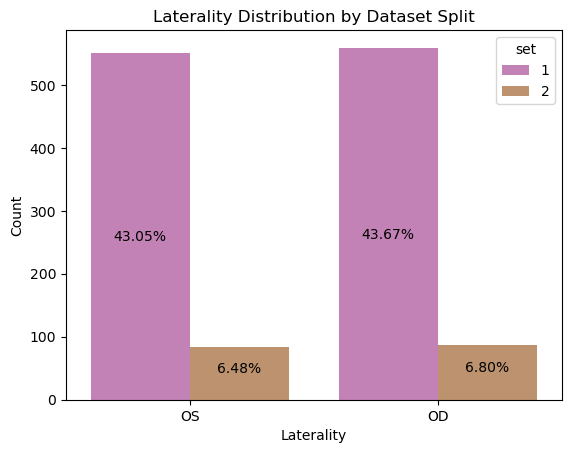

In [10]:
ax = sns.countplot(data=mdf, x='laterality', hue='set', palette=palette[4:])
total = len(mdf)
displayPercentages(ax, total)
plt.title("Laterality Distribution by Dataset Split")
plt.xlabel("Laterality")
plt.ylabel("Count")
plt.show()

### Image Type Distributions

/tmp/ipykernel_879914/3083071839.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=mdf, x='image_type', hue='set', palette=palette[7:], ax=ax.flat[0])
/tmp/ipykernel_879914/3083071839.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=mdf, x='set', hue='set', palette=palette[7:], ax=ax.flat[1])


Text(0, 0.5, 'Count')

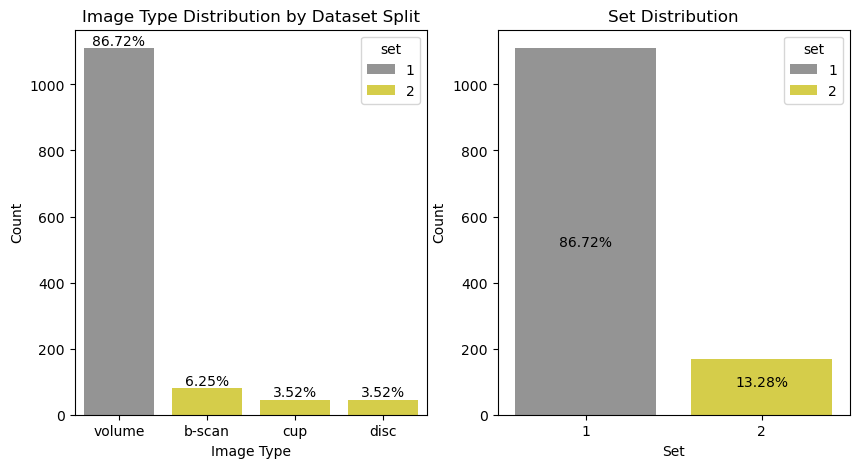

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=mdf, x='image_type', hue='set', palette=palette[7:], ax=ax.flat[0])
displayPercentages(ax.flat[0], total, yadjust=1)
ax.flat[0].set_title("Image Type Distribution by Dataset Split")
ax.flat[0].set_xlabel("Image Type")
ax.flat[0].set_ylabel("Count")

sns.countplot(data=mdf, x='set', hue='set', palette=palette[7:], ax=ax.flat[1])
displayPercentages(ax.flat[1], total)
ax.flat[1].set_title("Set Distribution")
ax.flat[1].set_xlabel("Set")
ax.flat[1].set_ylabel("Count")

## Visualizing Volumes & Images 

In [19]:
# Separate into the original sets

# Volumes
vdf = mdf[mdf.set == 1]

# 2D Images
idf = mdf[mdf.set == 2]


vdf.shape, idf.shape

((1110, 6), (170, 6))

In [20]:
idf['patient_id'] = idf.patient_id.str.extract(r'(\d+)', expand=False).astype(int)
idf.sort_values(by=['patient_id','laterality','dx_class','image_type'], inplace=True)
idf.head()

# idf.set_index(['patient_id','laterality','dx_class','image_type'], inplace=False)


/tmp/ipykernel_879914/1033442275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['patient_id'] = idf.patient_id.str.extract(r'(\d+)', expand=False).astype(int)
/tmp/ipykernel_879914/1033442275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf.sort_values(by=['patient_id','laterality','dx_class','image_type'], inplace=True)


,dx_class,patient_id,laterality,image_type,set,filepath
1230,normal,1,OD,b-scan,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1231,normal,1,OD,cup,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1229,normal,1,OD,disc,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1126,glaucoma,1,OS,b-scan,2,../datasrc/fundus-oct-composite/Glaucoma/P_1/L...
1128,glaucoma,1,OS,cup,2,../datasrc/fundus-oct-composite/Glaucoma/P_1/L...


<div class="alert alert-warning alert-dismissible fade show" style="color:magenta">
        <strong>place-holder: code / functions for visualizing volume slices</strong>
</div>
</div>

### Pixel Intensity Distributions 

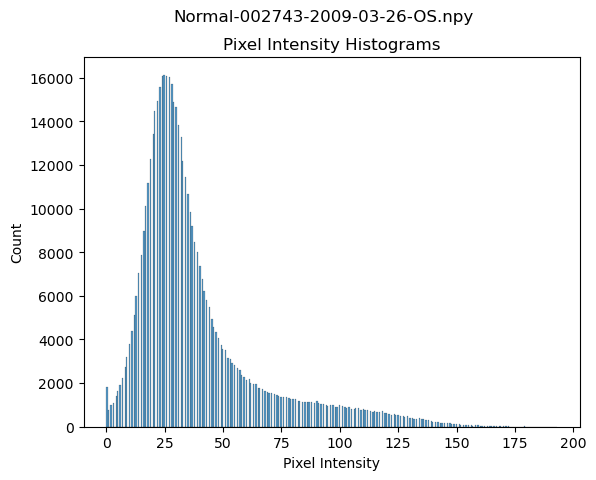

In [13]:
def pixelIntensityHistogram(index,ax=None): 
    filepath = mdf.filepath[index]
    
    visdata = np.load(filepath)
    
    pix_intensities = visdata.flatten()
    
    filename = os.path.basename(filepath)
    
    sns.histplot(pix_intensities, ax=ax)
    
    plt.title("Pixel Intensity Histograms")
    
    if ax:
        ax.set_title(f"{filename}")
        ax.set_xlabel("Pixel Intensity")
        ax.set_ylabel("Count")
    else:
        plt.suptitle(f"{filename}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Count")

pixelIntensityHistogram(1)
        

Text(0.5, 0.98, 'Pixel Intensity Histograms for First 9 Volumes')

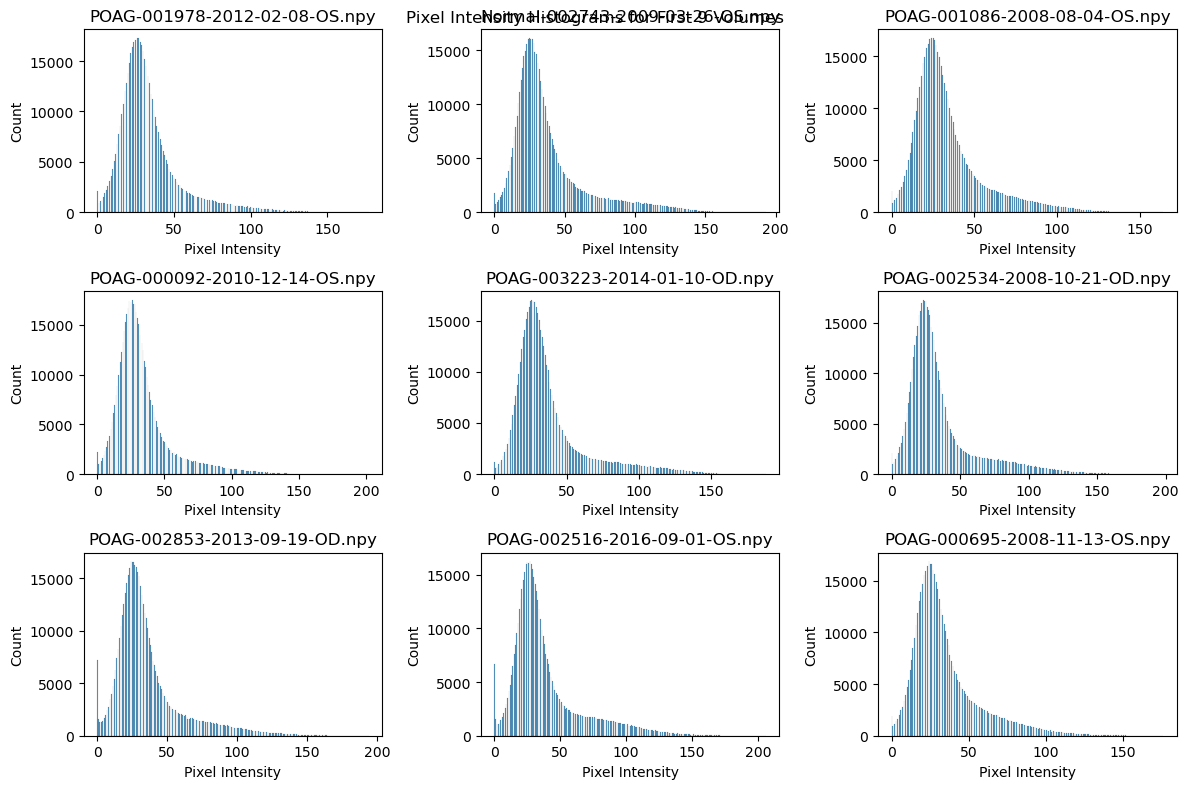

In [15]:
_,ax = plt.subplots(3,3,figsize=(12,8))

for i in range(9):
    pixelIntensityHistogram(i,ax=ax.flat[i])

plt.tight_layout()
plt.suptitle("Pixel Intensity Histograms for First 9 Volumes")


In [24]:
pidsWithMarkers = idf[idf.image_type != 'b-scan']['patient_id'].unique()
pidsNoMarkers = [ i for i in idf.patient_id.unique() if i not in pidsWithMarkers ]

pidsWithMarkers, pidsNoMarkers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [25]:
withMarkers = idf[idf.patient_id.isin(pidsWithMarkers)]
noMarkers = idf[idf.patient_id.isin(pidsNoMarkers)]

wmj = withMarkers["patient_id filepath".split(" ")]
wmj.set_index(["patient_id",'filepath'],inplace=True)

nmj = noMarkers["patient_id filepath".split(" ")]
nmj.set_index(["patient_id",'filepath'],inplace=True)

wmj = {pid:list(withMarkers[withMarkers['patient_id'] == pid]['filepath']) for pid in pidsWithMarkers}
nmj = {pid:list(noMarkers[noMarkers['patient_id'] == pid]['filepath']) for pid in pidsNoMarkers}

wmj[1]

['../datasrc/fundus-oct-composite/Healthy/P_1/Right_Eye/2610157_20151026_121740_B-scan_R_001.jpg',
 '../datasrc/fundus-oct-composite/Healthy/P_1/Right_Eye/OCT_Right_Normal_Cup.jpg',
 '../datasrc/fundus-oct-composite/Healthy/P_1/Right_Eye/OCT_Right_Normal_Disc.jpg',
 '../datasrc/fundus-oct-composite/Glaucoma/P_1/Left_Eye/2010154_20151020_093741_B-scan_L_001.jpg',
 '../datasrc/fundus-oct-composite/Glaucoma/P_1/Left_Eye/OCT_Left_Glaucoma_Cup.jpg',
 '../datasrc/fundus-oct-composite/Glaucoma/P_1/Left_Eye/OCT_Left_Glaucoma_Disc.jpg',
 '../datasrc/fundus-oct-composite/Healthy/P_1/Left_Eye/2610157_20151026_121417_B-scan_L_001.jpg',
 '../datasrc/fundus-oct-composite/Healthy/P_1/Left_Eye/OCT_Left_Normal_Cup.jpg',
 '../datasrc/fundus-oct-composite/Healthy/P_1/Left_Eye/OCT_Left_Normal_Disc.jpg']

In [26]:
# Custom function defined in grid_dimension_optimizer.py
from grid_dimension_optimizer import optimal_grid

#help(optimal_grid)

In [27]:
def ptImageSetViewer(pid,figdims=None, figsize=(12,8)):

    ptdf = idf[idf.patient_id == pid]
    total = len(ptdf)

    if figdims:
        nrows,ncols = figdims
    else:
        nrows,ncols = optimal_grid(total)

    _,ax = plt.subplots(nrows,ncols,figsize=figsize)
    
    axf = ax.flat

    for i in range(total):
        ptrecord = ptdf.iloc[i]
        axf[i].imshow(cv2.imread(ptrecord.filepath))
        axf[i].set_title(f"{ptrecord.image_type} | {ptrecord.dx_class} | {ptrecord.laterality}\n{os.path.basename(ptrecord.filepath)}",fontsize=10)
    
    plt.suptitle(f"Patient {pid}",fontsize=12)
    plt.tight_layout()

ptImageSetViewer(noMarkers[10],figsize=(6,10))

KeyError: 10

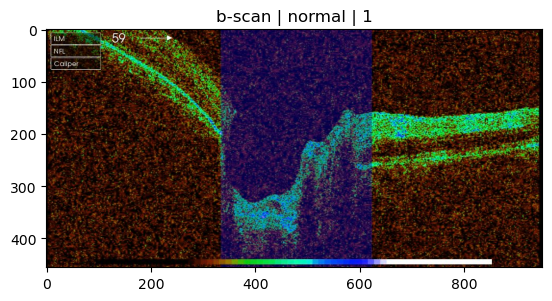

In [28]:
def imageViewer(index, ax=None):
    iPath = idf.filepath.iloc[index]
    iType = idf.image_type.iloc[index]
    dxLabel = idf.dx_class.iloc[index]
    pid = idf.patient_id.iloc[index]
    title = f"{iType} | {dxLabel} | {pid}"
    if ax:
        ax.imshow(cv2.imread(iPath))
        ax.set_title(title)
    else:
        plt.imshow(cv2.imread(iPath))
        plt.title(title)
    

imageViewer(0)


In [2]:
vidFilePaths = ['../datasrc/fundus-oct-composite/Healthy/P_12/Left_Eye/2d_lt.wmv',
 '../datasrc/fundus-oct-composite/Healthy/P_12/Right_Eye/2d_rt.wmv']

In [6]:
def displayWMV(wmvPath):

    filename = os.path.basename(wmvPath)
    # oDIR = os.path.dirname(wmvPath)
    # Convert wmv files to mp4 to be viewed in jupyter
    oPATH = os.path.join('/tmp',f'{filename.split(".")[0]}_temp.mp4')
    subprocess.run(["ffmpeg","-loglevel","error", "-i", wmvPath, oPATH, "-y"])
    video = Video(oPATH)
    display(video)

displayWMV(vidFilePaths[0])

While this suggests the possibility reconstructing a volume from the frames (particularly since they go from index 0 to 127, therefore contributing to a width of 128px in that dimension, and can be downsampled to 64px in that dimension to match that of the volumes in the other set), there are only two videos in the entire set, it seems, and would contribute two healthy volumes for a single patient (OS/OD).  Unlikely to be of much use here, but can get back to it later if desired.  Now, back to extracting tabular data from the paths.

In [ ]:
def InputImageStandardizer(imageInput):
    '''Converts various forms of input for an image to a numpy array, including:
        1. Image object (NumPy array in memory / assigned to a variable) - no change
        2. Path to image file - should be compatible with `cv2.imread()` if possible 
            (e.g., '.jpg','.png','.jpeg')
        3. Path to a NumPy array file (`.npy`) - will read using `numpy.load()`
    '''

    # If the input is already a NumPy array, no change is needed
    if type(imageInput) == np.ndarray:
        imageArray = imageInput

    # If the input is a string, it may be a path to an image or a path to a NumPy array
    elif type(imageInput) == str:
        try:
            # Make the path exists and is a file
            if os.path.isfile(imageInput):
                # Check if the file is a conventional image file
                magicReport = magic.from_file(imageInput)
                if 'image' in magicReport:
                    # Try first to read the image using `cv2.imread()` - should work for most images
                    try:
                        imageArray = cv2.imread(imageInput)
                    except:
                        # If that fails, try to read the image using `cv2.imdecode()`
                        #  -  this may work for certain image types not supported by `cv2.imread()`
                        #  -  e.g., certain forms of TIFF, BMP, etc.
                        try:
                            imageArray = cv2.imdecode(np.fromfile(imageInput,dtype=np.uint8),cv2.IMREAD_COLOR)
                        except:
                            raise ValueError(f'Image format not supported: {magicReport}')
                    
                    # Since `cv2.imread()` and `cv2.imdecode()` return images in BGR format, convert to RGB for compatibility with plt.imshow()
                    imageArray = cv2.cvtColor(imageArray,cv2.COLOR_BGR2RGB)

                # If the image file is in the form of a NumPy array file, read using `numpy.load()`
                elif magicReport.startswith('NumPy array'):
                    imageArray = np.load(imageInput)
                else:
                    raise ValueError(f'Image format not supported: {magicReport}')
            else:
                raise ValueError(f'Path is not a file: {imageInput}')
        except:
            raise ValueError(f'Invalid image path: {imageInput}')                            
    else:
        raise ValueError(f'Input type not supported: {type(imageInput)} -- skipping...')
    
    return imageArray

def imPanelShow(images:list, image_names:list=None, ncols=2, figsize=(10,10)):
    '''Displays a panel of images in a figure, with each image in a separate subplot.
    
    Parameters
    ----------
    images : list
        List of image paths or image arrays to be displayed in the panel.

    image_names : list, optional
        List of image names corresponding to the images, by default None
        If `images` is a list of paths, then the image names will be extracted from the paths.
        Otherwise, the image names will be the indices of the images in the list if `image_names` is not provided.

    ncols : int, optional
        Number of columns in the panel, by default 2

    figsize : tuple, optional
        Figure size, by default (10,10)
    
        
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object containing the panel of images.
    ax : matplotlib.axes.Axes
        Axes object containing the panel of images.
    '''
    
    # Standardize the input images list to a list of NumPy arrays
    imageArrays = [ InputImageStandardizer(i) for i in images ]

    # If no image names are provided, use the indices of the images in the list
    # if image_names is None:
    #     images = [str(i) for i in range(len(imageArrays))]
    # else:
    #     images = image_names

    # Determine the number of rows based on the number of images and specified number of columns (default is 2)
    # nrows = int(math.ceil(len(imageArrays)/ncols))
    nrows = len(imageArrays) // ncols
    if len(imageArrays) % 2 != 0:
        nrows += 1

    
    _,ax = plt.subplots(nrows,ncols,figsize=figsize)
    
    for i,img in enumerate(imageArrays):

        ax.flat[i].imshow(img)
        
        # If the image is a path, extract the image name from the path
        if type(images[i]) == str:
            title = os.path.basename(images[i])
        # Otherwise (i.e., if the image is a NumPy array)
        # If image names are provided, use those
        elif image_names is not None:
            title = os.path.basename(image_names[i])
        # If no image names are provided, use the indices of the images in the list as suffix
        else:
            title = f"image_{i}"
            
        ax.flat[i].set_title(title,fontsize=9)
    
    plt.subplots_adjust(hspace=.4)
        
# imPanelShow(sampleImgPaths)

In [ ]:
# 
bscans = [cv2.imread(i) for i in oct2D[oct2D['b-scan']]['filepath']]
bscans[0].shape

# lambda function to return the filepaths for a given patient ID number (i.e., the # in the P_# format)
ptscans = lambda i : oct2D[oct2D.pid.str.endswith(f"_{i}")]['filepath'].values

imPanelShow(ptscans(1),figsize=(10,5))


#### Identifying Shaded Region Boundaries via Color Transition

In [ ]:
# Since the image is in BGR format, convert to RGB for compatibility with plt.imshow()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

blue = img[:, :, 2].mean(axis=0)
green = img[:, :, 1].mean(axis=0)
red = img[:, :, 0].mean(axis=0)

fig,ax = plt.subplots(1,2,figsize=(12,3))
fig.suptitle(ptscans(2)[1])
ax.flat[0].imshow(img)
ax.flat[0].set_title(f'Original Image',fontsize=10)

ax.flat[1].plot(red,c='red')
ax.flat[1].plot(blue)
ax.flat[1].plot(green,c='green')
ax.flat[1].set_title(f'RGB Means',fontsize=10)

plt.tight_layout()
# plt.show()

#### Cropping Image

In [ ]:
threshold_b = 50
threshold_g = 50
threshold_r = 50

shaded_cols = np.where((blue > threshold_b) & (green < threshold_g) & (red < threshold_r))[0]

imgCR1 = img[:,shaded_cols,:]

imgCR1 = cv2.cvtColor(imgCR1,cv2.COLOR_BGR2RGB)

plt.imshow(imgCR1)

In [ ]:
def cropBSCAN(img,BGRthresh=(50,50,50),explore=False,showMode=None):

    if os.path.isfile(img):
        img = cv2.imread(img)

    # Crop out bottom scalebar
    row_scores = np.abs(np.diff(img.astype(int),axis=0)).mean(axis=(1,2))
    indices = np.where(row_scores[::-1] > 50)[0]
    top_of_band = img.shape[0] - indices.max() - 1
    imgbc = img[:top_of_band,:,:]

    # Crop out sides based on color transition
    blue = imgbc[:, :, 2].mean(axis=0)
    green = imgbc[:, :, 1].mean(axis=0)
    red = imgbc[:, :, 0].mean(axis=0)
    
    if explore:
        plt.plot(red,c='red')
        plt.plot(blue,c='blue')
        plt.plot(green,c='green')
    else:
        threshold_b, threshold_g, threshold_r = BGRthresh
        shaded_cols = np.where((blue > threshold_b) & (green < threshold_g) & (red < threshold_r))[0]
        cropped_image = imgbc[:,shaded_cols,:]
        if showMode == 'compare':
            fig,(l,r) = plt.subplots(1,2,figsize=(8,8))
            l.imshow(cropped_image)
            r.imshow(img)
        elif showMode == 'result':
            plt.imshow(cropped_image)
        else:
            return cropped_image

cropBSCAN(ptscans(11)[0],showMode='compare')

In [ ]:
# Not all images had shaded ONH / optic disc regions, so remove those for now
bscanCroppables = [ i for i in bscanCROPPED if i.shape[1] > 0]
len(bscanCroppables)

In [ ]:
meanWidth = np.array([ i.shape[1] for i in bscanCroppables ]).mean().astype(int)
meanHeight = np.array([ i.shape[0] for i in bscanCroppables ]).mean().astype(int)
meanAR = (meanWidth / meanHeight).round(3)
from fractions import Fraction
print(f'Mean width: {meanWidth}')
print(f'Mean height: {meanHeight}')
print(f'Mean AR: {meanAR} ({Fraction(meanAR).limit_denominator()})')

In [ ]:
def normalize2Dimage(imgArray, preview=True):
    

    # crop to AR of 1:2 (width:height)
    height, width = imgArray.shape[:2]
    aspect_ratio = width / height

    # Determine which axis is too long
    if aspect_ratio > 0.5:  # width is too long
        # Calculate the amount of pixels to shave off from both sides
        shave_pixels = int((width - 0.5 * height) / 2)
        # Crop the image
        iarNorm = imgArray[:, shave_pixels:-shave_pixels, :]
    else:  # height is too long
        # Calculate the amount of pixels to shave off from both sides
        shave_pixels = int((height - 2 * width) / 2)
        # Crop the image
        iarNorm = imgArray[shave_pixels:-shave_pixels, :, :]

    
    # downsample to 64x128
    iarNorm = cv2.resize(iarNorm, (64, 128))

    if preview:
        print(f"{shave_pixels} pixels shaved off from each side.")
        fig,ax = plt.subplots(1,2,figsize=(12,12))
        ax[0].imshow(imgArray)
        ax[0].set_title(f'Original Image {imgArray.shape}',fontsize=10)
        ax[1].imshow(iarNorm)
        ax[1].set_title(f'Normalized Image {iarNorm.shape}',fontsize=10)
       
    else:
        return iarNorm



normalize2Dimage(bscanCroppables[5])

normBSCANs = [ normalize2Dimage(i,preview=False) for i in bscanCroppables ]
normBSCANs = [ i[:,:,1] for i in normBSCANs ]


imPanelShow(normBSCANs[0:20], ncols=5, figsize=(12,12))


bcvars = [ cv2.convertScaleAbs(normBSCANs[0],alpha=a,beta=b) for a in np.linspace(0,2,10) for b in np.linspace(0,255,20).astype(int)]

len(bcvars)

imPanelShow(bcvars[30:45], ncols=5
            , figsize=(12,12))

Attempted to check image similarity scores to see if cropped images could match up with slices of the volumes?

In [ ]:
from skimage import metrics

ref_image = vol[32,:,:]



# Define the similarity metric
def similarity_metric(image1, image2):
    return metrics.structural_similarity(image1, image2)

# Calculate the similarity scores
similarity_scores = []
for image in bcvars:
    score = similarity_metric(ref_image, image)
    similarity_scores.append(score)

for i,s in enumerate(similarity_scores):
    print(f'{i}: {s}')

# Find the maximum similarity score
max_score_index = np.argmin(similarity_scores)

print(f"\n\nMaximum similarity score: {max_score_index} {similarity_scores[max_score_index]}")

plt.imshow(bcvars[90])
similarity_scores[90]

# # Retrieve the best alpha/beta values
# best_alpha = alpha_values[max_score_index // len(beta_values)]
# best_beta = beta_values[max_score_index % len(beta_values)]

# print(f"Best alpha/beta values: {best_alpha}, {best_beta}")
